In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

Load Data

In [27]:
df = pd.read_csv("kindle_reviews.csv",keep_default_na=False)
df = df[~df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)]
#df.to_csv('kindle_reviews_removed.csv', index=False)

Count review Lengths

In [28]:
df['reviewLength'] = df.reviewText.str.lower().str.split().apply(len)
lengths = df.reviewLength.value_counts()
print(f"Max text length is {df.reviewLength.max()}")

Max text length is 4385


In [29]:
# index = df.reviewLength.argmax()
# pprint(df.iloc[index].reviewText)

The distribution of review word count

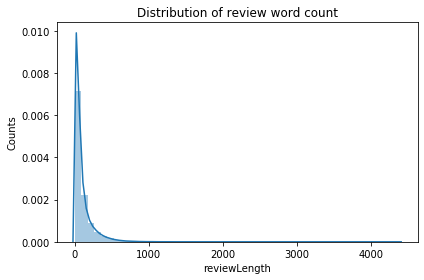

In [30]:
#remove_outliers = df[np.abs(df.reviewLength-df.reviewLength.mean())<=(3*df.reviewLength.std())] 
#keep only the ones that are within +3 to -3 standard deviations in the column 'reviewLength'

#ax = sns.distplot(remove_outliers.reviewLength)
ax = sns.distplot(df.reviewLength)
ax.set(ylabel='Counts', title="Distribution of review word count")
# Mention the removal of outliers due to long review lengths
ax.get_figure().tight_layout()
ax.get_figure().savefig("distribution_of_review_lengths.png")

The distribution of review words

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df.reviewText, 20)
print(common_words)

[('the', 5056037), ('and', 3583044), ('to', 3120562), ('of', 2141465), ('is', 1779892), ('it', 1739920), ('this', 1738039), ('in', 1510812), ('that', 1352471), ('book', 1245950), ('was', 1231602), ('for', 1092393), ('her', 930686), ('with', 915182), ('you', 899761), ('but', 829963), ('story', 752838), ('she', 740649), ('read', 684330), ('he', 626288)]
